# Plot parameters

In [1]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            'font.size': 12,
            'figure.figsize': (7.,5.),
            'legend.loc':'best'
           }

In [2]:
plotpars_small = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            'font.size': 12,
            'figure.figsize': (7.,4)
           }

# Libraries

In [3]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker  as mtick
import seaborn            as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec  import GridSpec

# Data

In [4]:
my_data = pd.read_csv('../../Catalogue/Match07_small_mags_doubleclean_type.csv')

# Cleaning my data

In [5]:
np.unique(my_data['UV_CLASS_YI2011'])

array(['RSF', 'UV_UPTURN', 'UV_WEAK'], dtype=object)

#### Redshift limits

In [6]:
z_min=0.06
z_max=0.40

#### Requirements for cleaning this data

In [7]:
my_data_clean = my_data.loc[(my_data['MAG_AB_R']>0)&
                            (my_data['MAG_AB_R']<19.8)&
                            (my_data['MAG_AB_NUV']>0)&
                            (my_data['MAG_AB_FUV']>0)&
                            (my_data['MAG_AB_FUV']-my_data['MAG_AB_NUV']<50)&
                            (my_data['MAG_AB_FUV']-my_data['MAG_AB_NUV']>-20)&
                            (my_data['Z']>=z_min)&
                            (my_data['PROB']>0.8)&
                            (my_data['TYPE']==3)]

In [8]:
my_data_clean

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,MAG_ABSOLUTE_G,MAG_ABSOLUTE_R,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE
1,585610,588848899914268877,183.6357,-0.180381,3.5,4.62,21.0320,0.0486,2,19.7814,...,-19.961498,-21.221265,-21.790239,-21.937685,-21.534065,-21.671768,-21.333374,-21.381876,RSF,3
4,585622,588848899914334317,183.7372,-0.046642,3.5,4.62,20.2965,0.0263,0,18.8096,...,-19.095742,-19.963068,-20.539217,-20.850392,-20.399912,-20.425870,-20.188683,-19.950501,RSF,3
7,585630,588848899914334392,183.8403,-0.045170,3.5,4.62,20.6158,0.0314,2,19.4969,...,-20.278186,-20.972381,-21.501279,-21.632659,-21.099273,-21.082411,-20.789069,-20.824911,RSF,3
9,585637,588848899914334460,183.7989,-0.059996,3.5,5.28,21.5860,0.1193,2,19.8666,...,-19.846266,-21.869594,-22.577848,-22.980033,-22.429262,-22.649492,-22.521685,-22.513193,RSF,3
10,585667,588848899914399953,183.8874,-0.076773,3.5,5.28,21.0229,0.0584,0,19.8678,...,-20.574257,-22.231674,-22.788999,-23.247800,-22.647159,-22.757948,-22.620589,-22.781031,RSF,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21294,585409,588848899913810261,182.6236,-0.118058,3.5,5.28,20.4630,0.0418,0,19.7666,...,-18.280883,-19.439805,-20.191305,-20.612478,-20.227940,-20.381691,-20.215257,-20.145758,RSF,3
21297,585436,588848899913875691,182.8106,-0.015192,3.5,4.62,20.2875,0.0338,2,19.1236,...,-19.618855,-20.272439,-20.870720,-20.911356,-20.521808,-20.436937,-20.165621,-20.073729,RSF,3
21298,585450,588848899913875754,182.8055,-0.045858,3.5,5.28,20.5160,0.0413,2,19.6846,...,-19.419521,-20.638584,-21.427449,-21.770306,-21.332929,-21.604374,-21.472820,-21.495194,RSF,3
21299,585465,588848899913941263,182.8369,-0.154758,3.5,5.28,20.5227,0.0387,2,19.7014,...,-20.302099,-21.491046,-22.046238,-22.454552,-21.799156,-21.927908,-21.851561,-21.915446,RSF,3


### Stratifying into UV classes: RSF, UV weak, and UV upturn

In [9]:
rsf_df = my_data_clean.loc[(my_data_clean['MAG_AB_NUV']-my_data_clean['MAG_AB_R']<5.4)]

In [10]:
uvwk_df = my_data_clean.loc[(my_data_clean['MAG_AB_NUV']-my_data_clean['MAG_AB_R']>5.4)&
                            (my_data_clean['MAG_AB_FUV']-my_data_clean['MAG_AB_R']>6.6)]

In [11]:
uvup_df = my_data_clean.loc[(my_data_clean['MAG_AB_FUV']-my_data_clean['MAG_AB_NUV']<0.9)&
                            (my_data_clean['MAG_AB_NUV']-my_data_clean['MAG_AB_R']>5.4)&
                            (my_data_clean['MAG_AB_FUV']-my_data_clean['MAG_AB_R']<6.6)]

In [12]:
print(rsf_df.shape, uvwk_df.shape, uvup_df.shape)

(13825, 162) (288, 162) (210, 162)


# Yi et al. (2011) plots

In [13]:
palette = ['#018571', '#dfc27d', '#a6611a']

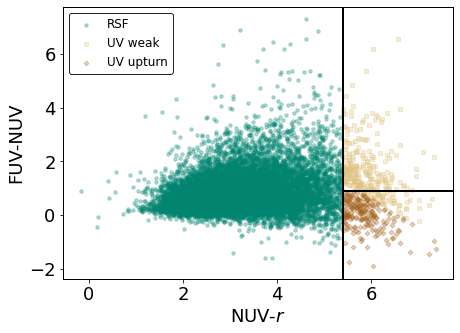

In [14]:
plt.rcParams.update(plotpars)
plt.scatter((rsf_df['MAG_AB_NUV']-rsf_df['MAG_AB_R']), (rsf_df['MAG_AB_FUV']-rsf_df['MAG_AB_NUV']), marker='o',
            s=12, color=palette[0], alpha=0.3, label='RSF')

plt.scatter((uvwk_df['MAG_AB_NUV']-uvwk_df['MAG_AB_R']), (uvwk_df['MAG_AB_FUV']-uvwk_df['MAG_AB_NUV']), 
            marker='s', s=12, color=palette[1], alpha=0.3, label='UV weak')

plt.scatter((uvup_df['MAG_AB_NUV']-uvup_df['MAG_AB_R']), (uvup_df['MAG_AB_FUV']-uvup_df['MAG_AB_NUV']), 
            marker='D', s=12, color=palette[2], alpha=0.3, label='UV upturn')

plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.718, xmax=2, color='black', linewidth=2.)
plt.legend()
plt.xlabel(r"NUV-$r$")
plt.ylabel(r"FUV-NUV")
plt.show()